# Diabetes Dataset

The dataset can be found [here](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

The dataset consists of the following features:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome

The target variable is Outcome, which states whether the patient is diabetic or not. The dataset is of low-volume.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Diabetes Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Missing values.

## Split into Inputs and Targets

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
from collections import Counter
Counter(y)

Counter({1: 268, 0: 500})

## Split into train and test sets

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (614, 8)
Shape y_train:  (614,)
Shape x_test:  (154, 8)
Shape y_test:  (154,)


## Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## ML Techniques - Imbalanced Target Class

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Support Vector Machine

In [11]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(x_train, y_train)
y_pred_SVC = support_vector.predict(x_test)

In [12]:
y_pred_SVC_train = support_vector.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_SVC_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_SVC))

Accuracy of the training set:  0.8338762214983714
Accuracy of the testing set:  0.7337662337662337


In [13]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



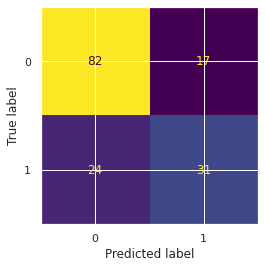

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC, colorbar=False)

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
y_pred_log_reg = log_reg.predict(x_test)

In [17]:
y_pred_log_reg_train = log_reg.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_log_reg_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_log_reg))

Accuracy of the training set:  0.7703583061889251
Accuracy of the testing set:  0.7532467532467533


In [18]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



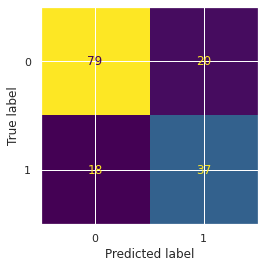

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg, colorbar=False)

### Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x_train, y_train)
Gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [21]:
y_pred_Gaussian = Gaussian.predict(x_test)

In [22]:
y_pred_Gaussian_train = Gaussian.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_Gaussian_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_Gaussian))

Accuracy of the training set:  0.752442996742671
Accuracy of the testing set:  0.7662337662337663


              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



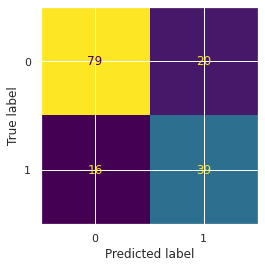

In [23]:
print(classification_report(y_test, y_pred_Gaussian))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Gaussian, colorbar=False)

### k-Neighbours Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [25]:
y_pred_kNN = kNN.predict(x_test)
y_pred_kNN_train = kNN.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the training set:  0.8241042345276873
Accuracy of the testing set:  0.6948051948051948


              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



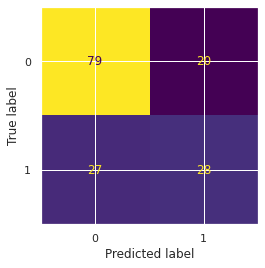

In [26]:
print(classification_report(y_test, y_pred_kNN))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar=False)

### Decision Tree Classifier

We limit the *max_depth* since this is a small dataset, in order to avoid overfitting.

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(max_depth=4)
DT_classifier.fit(x_train, y_train)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
y_pred_DT = DT_classifier.predict(x_test)
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the training set:  0.7980456026058632
Accuracy of the testing set:  0.6948051948051948


              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



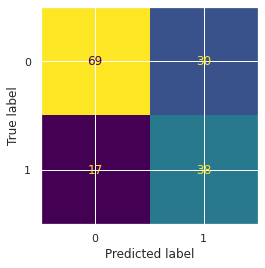

In [29]:
print(classification_report(y_test, y_pred_DT))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

### Random Forest Classifier

We limit the max_depth since this is a small dataset, in order to avoid overfitting.

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=4)
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
y_pred_RF = RF_classifier.predict(x_test)
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the training set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the training set:  0.8289902280130294
Accuracy of the testing set:  0.7727272727272727


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



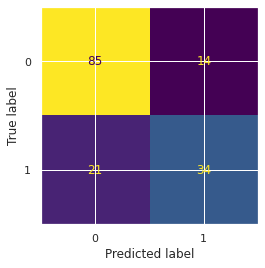

In [32]:
print(classification_report(y_test, y_pred_RF))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar=False)

### AdaBoost Classifier

We limit the learning_rate, since it can lead to overfitting.

In [33]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(learning_rate=0.01)
adaboost.fit(x_train, y_train)
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.01,
 'n_estimators': 50,
 'random_state': None}

In [34]:
y_pred_Adaboost = adaboost.predict(x_test)
print('Accuracy of the training set: ', adaboost.score(x_train, y_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_Adaboost))

Accuracy of the training set:  0.749185667752443
Accuracy of the testing set:  0.7402597402597403


No overfitting issues here.

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        99
           1       0.78      0.38      0.51        55

    accuracy                           0.74       154
   macro avg       0.76      0.66      0.67       154
weighted avg       0.75      0.74      0.71       154



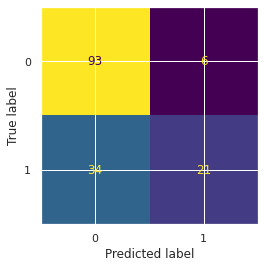

In [35]:
print(classification_report(y_test, y_pred_Adaboost))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Adaboost, colorbar=False)

### XGBoost Classifier

We limit the n_estimators and the learning_rate.

In [36]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=50, learning_rate = 0.01)
xgb_classifier.fit(x_train, y_train)
xgb_classifier.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [37]:
y_pred_XGB = xgb_classifier.predict(x_test)
print('Accuracy of the training set: ', xgb_classifier.score(x_train, y_train))
print('Accuracy of the testing set: ', accuracy_score(y_test, y_pred_XGB))

Accuracy of the training set:  0.7801302931596091
Accuracy of the testing set:  0.7662337662337663


In [38]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb_classifier, x_train, y_train, cv=3))

[0.74146341 0.74634146 0.73039216]


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



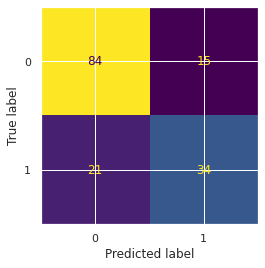

In [39]:
print(classification_report(y_test, y_pred_XGB))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_XGB, colorbar=False)

### ROC Curve

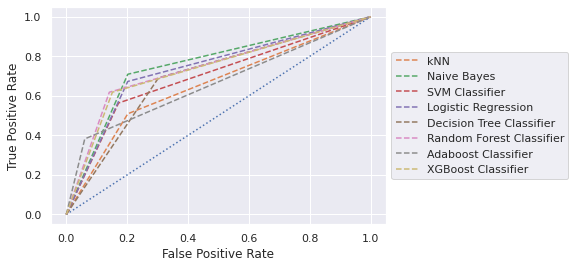

In [40]:
from sklearn.metrics import roc_curve
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_Gaussian)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_SVC)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
fpr7, tpr7, thresholds = roc_curve(y_test, y_pred_Adaboost)
plt.plot(fpr7, tpr7, '--', label='Adaboost Classifier')
fpr8, tpr8, thresholds = roc_curve(y_test, y_pred_XGB)
plt.plot(fpr8, tpr8, '--', label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

### Accuracy Score

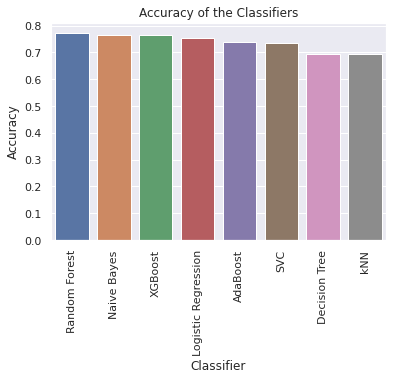

In [41]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracy_df['Accuracy'] = [accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_kNN), accuracy_score(y_test, y_pred_Gaussian), 
                           accuracy_score(y_test, y_pred_SVC), accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_RF),
                           accuracy_score(y_test, y_pred_Adaboost), accuracy_score(y_test, y_pred_XGB)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

For a better ROC Curve, it is required to balance the dataset, since the target class is NOT Balanced.

From the accuracy score, it can be seen that Random Forest, Naive Bayes and XGBoost Classifiers are better of the algorithms implemented. However, in healthcare, we must be cautious about choosing the right classifier, since the false positives and false negatives could have significant consequences on the patient. Thus, it is imperative to improve the ROC Curve.

## Balancing the Dataset - Oversampling

In [42]:
from imblearn.over_sampling import ADASYN
from collections import Counter
adasyn = ADASYN()
X, Y = adasyn.fit_resample(x, y)
Counter(Y)

Counter({1: 474, 0: 500})

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.2)
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', Y_train.shape)
print('y_test shape: ', Y_test.shape)

x_train shape:  (779, 8)
x_test shape:  (195, 8)
y_train shape:  (779,)
y_test shape:  (195,)


## ML Techniques - Imbalanced Target Class

### Support Vector Machine

In [44]:
from sklearn.svm import SVC
support_vector_balanced = SVC()
support_vector_balanced.fit(X_train, Y_train)
y_pred_SVC_balanced = support_vector_balanced.predict(X_test)

In [45]:
y_pred_SVC_train_balanced = support_vector_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_SVC_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_SVC_balanced))

Accuracy of the training set:  0.7137355584082157
Accuracy of the testing set:  0.6871794871794872


In [46]:
print(classification_report(Y_test, y_pred_SVC_balanced))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        98
           1       0.71      0.62      0.66        97

    accuracy                           0.69       195
   macro avg       0.69      0.69      0.69       195
weighted avg       0.69      0.69      0.69       195



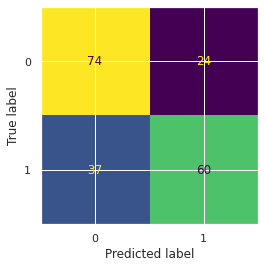

In [47]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_SVC_balanced, colorbar=False)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg_balanced = LogisticRegression(max_iter = 1000)
log_reg_balanced.fit(X_train, Y_train)
log_reg_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
y_pred_log_reg_balanced = log_reg_balanced.predict(X_test)
y_pred_log_reg_train_balanced = log_reg_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_log_reg_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_log_reg_balanced))

Accuracy of the training set:  0.7368421052631579
Accuracy of the testing set:  0.6974358974358974


In [50]:
print(classification_report(Y_test, y_pred_log_reg_balanced))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        98
           1       0.72      0.65      0.68        97

    accuracy                           0.70       195
   macro avg       0.70      0.70      0.70       195
weighted avg       0.70      0.70      0.70       195



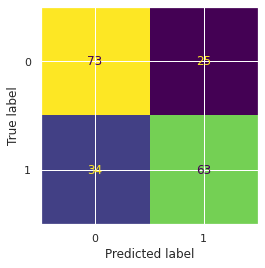

In [51]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_log_reg_balanced, colorbar=False)

### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
Gaussian_balanced = GaussianNB()
Gaussian_balanced.fit(X_train, Y_train)
Gaussian_balanced.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [53]:
y_pred_Gaussian_balanced = Gaussian_balanced.predict(X_test)
y_pred_Gaussian_train_balanced = Gaussian_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_Gaussian_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_Gaussian_balanced))

Accuracy of the training set:  0.7034659820282413
Accuracy of the testing set:  0.7384615384615385


              precision    recall  f1-score   support

           0       0.70      0.83      0.76        98
           1       0.79      0.65      0.71        97

    accuracy                           0.74       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.74      0.74       195



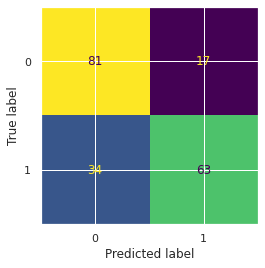

In [54]:
print(classification_report(Y_test, y_pred_Gaussian_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Gaussian_balanced, colorbar=False)

### k-Neighbours Classifier

We can quickly tweak the n_neighbors to prevent overfitting.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kNN_balanced = KNeighborsClassifier(n_neighbors = 10)
kNN_balanced.fit(X_train, Y_train)
kNN_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [56]:
y_pred_kNN_balanced = kNN_balanced.predict(X_test)
y_pred_kNN_train_balanced = kNN_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_kNN_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_kNN_balanced))

Accuracy of the training set:  0.7637997432605905
Accuracy of the testing set:  0.7128205128205128


              precision    recall  f1-score   support

           0       0.71      0.71      0.71        98
           1       0.71      0.71      0.71        97

    accuracy                           0.71       195
   macro avg       0.71      0.71      0.71       195
weighted avg       0.71      0.71      0.71       195



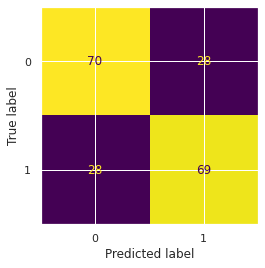

In [57]:
print(classification_report(Y_test, y_pred_kNN_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_kNN_balanced, colorbar=False)

### Decision Tree Classifier

We limit the *max_depth* since this is a small dataset, in order to avoid overfitting.

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_balanced = DecisionTreeClassifier(max_depth=4)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
y_pred_DT_balanced = DT_classifier_balanced.predict(X_test)
y_pred_DT_train_balanced = DT_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_DT_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_DT_balanced))

Accuracy of the training set:  0.7958921694480102
Accuracy of the testing set:  0.7128205128205128


              precision    recall  f1-score   support

           0       0.71      0.71      0.71        98
           1       0.71      0.71      0.71        97

    accuracy                           0.71       195
   macro avg       0.71      0.71      0.71       195
weighted avg       0.71      0.71      0.71       195



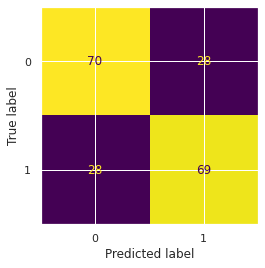

In [60]:
print(classification_report(Y_test, y_pred_DT_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_DT_balanced, colorbar=False)

### Random Forest Classifier

We limit the max_depth since this is a small dataset, in order to avoid overfitting.

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_balanced = RandomForestClassifier(max_depth=4)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
y_pred_RF_balanced = RF_classifier_balanced.predict(X_test)
y_pred_RF_train_balanced = RF_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_RF_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy of the training set:  0.8215661103979461
Accuracy of the testing set:  0.7589743589743589


              precision    recall  f1-score   support

           0       0.76      0.76      0.76        98
           1       0.76      0.76      0.76        97

    accuracy                           0.76       195
   macro avg       0.76      0.76      0.76       195
weighted avg       0.76      0.76      0.76       195



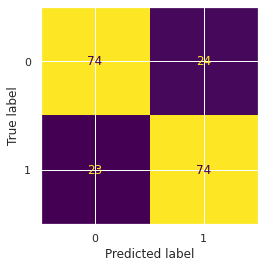

In [63]:
print(classification_report(Y_test, y_pred_RF_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_RF_balanced, colorbar=False)

### AdaBoost Classifier

We limit the learning_rate, since it can lead to overfitting.

In [64]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_balanced = AdaBoostClassifier(learning_rate=0.01)
adaboost_balanced.fit(X_train, Y_train)
adaboost_balanced.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.01,
 'n_estimators': 50,
 'random_state': None}

In [65]:
y_pred_Adaboost_balanced = adaboost_balanced.predict(X_test)
print('Accuracy of the training set: ', adaboost_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_Adaboost_balanced))

Accuracy of the training set:  0.7291399229781772
Accuracy of the testing set:  0.6974358974358974


No overfitting issues here.

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        98
           1       0.68      0.74      0.71        97

    accuracy                           0.70       195
   macro avg       0.70      0.70      0.70       195
weighted avg       0.70      0.70      0.70       195



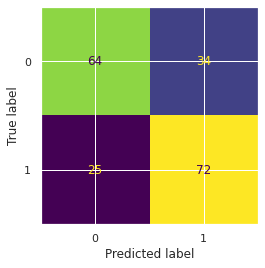

In [66]:
print(classification_report(Y_test, y_pred_Adaboost_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Adaboost_balanced, colorbar=False)

### XGBoost Classifier

We limit the n_estimators and the learning_rate.

In [67]:
from xgboost import XGBClassifier
xgb_classifier_balanced = XGBClassifier(n_estimators=50, learning_rate = 0.01)
xgb_classifier_balanced.fit(X_train, Y_train)
xgb_classifier_balanced.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [68]:
y_pred_XGB_balanced = xgb_classifier_balanced.predict(X_test)
print('Accuracy of the training set: ', xgb_classifier_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_XGB_balanced))

Accuracy of the training set:  0.7971758664955071
Accuracy of the testing set:  0.7333333333333333


In [69]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb_classifier_balanced, X_train, Y_train, cv=3))

[0.75384615 0.73461538 0.75289575]


              precision    recall  f1-score   support

           0       0.74      0.72      0.73        98
           1       0.73      0.74      0.73        97

    accuracy                           0.73       195
   macro avg       0.73      0.73      0.73       195
weighted avg       0.73      0.73      0.73       195



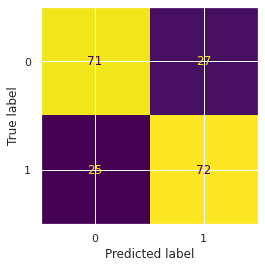

In [70]:
print(classification_report(Y_test, y_pred_XGB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_XGB_balanced, colorbar=False)

### ROC Curve

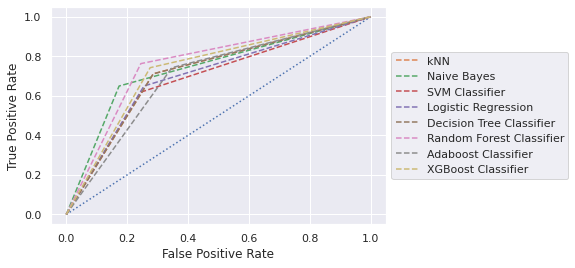

In [71]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred_Gaussian_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred_SVC_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred_log_reg_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(Y_test, y_pred_DT_balanced)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(Y_test, y_pred_RF_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
fpr7, tpr7, thresholds = roc_curve(Y_test, y_pred_Adaboost_balanced)
plt.plot(fpr7, tpr7, '--', label='Adaboost Classifier')
fpr8, tpr8, thresholds = roc_curve(Y_test, y_pred_XGB_balanced)
plt.plot(fpr8, tpr8, '--', label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

### Accuracy Score

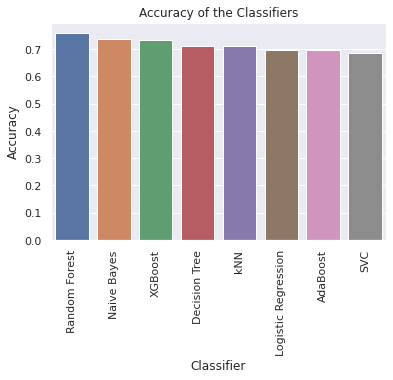

In [72]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracy_df['Accuracy'] = [accuracy_score(Y_test, y_pred_DT_balanced), accuracy_score(Y_test, y_pred_kNN_balanced), 
                           accuracy_score(Y_test, y_pred_Gaussian_balanced), accuracy_score(Y_test, y_pred_SVC_balanced), 
                           accuracy_score(Y_test, y_pred_log_reg_balanced), accuracy_score(Y_test, y_pred_RF_balanced),
                           accuracy_score(Y_test, y_pred_Adaboost_balanced), accuracy_score(Y_test, y_pred_XGB_balanced)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

Amongst the ML techniques implemented, we can see that Random Forest, Decision Tree, Naive Bayes and XGBoost Classifiers perform upto and close to 80% accuracy. We can also visualize from the ROC Curve that there is a slight improvement from when the target class was imbalanced. Balancing the dataset has little influence on the overall ROC Curve. For better ROC Curve and its respective characteristics, pruning of the Random Forests and Decision Tree Classifiers can be suggested. 